# 2.6 概率
- 概率给了我们一种正式的途径来说明我们的确定性水平。
- 概率是一种灵活的语言，用于说明我们的确定程度，并且它可以有效地应用于广泛的领域中。

## 2.6.1 基本概率论
- 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。

In [1]:
"""
扔骰子
- 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）
"""
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs=torch.ones([6])/6  # tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])
multinomial.Multinomial(1,fair_probs).sample()  # 扔一次
"""
使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。
"""
multinomial.Multinomial(10,fair_probs).sample()  # 扔10次

# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts/1000 # 相对频率作为估计值


tensor([0.1800, 0.1760, 0.1530, 0.1640, 0.1490, 0.1780])

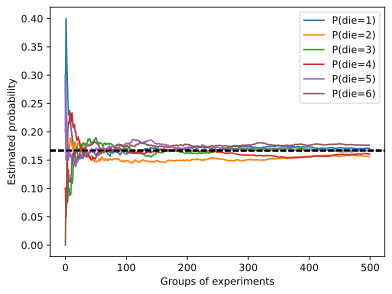

In [3]:
"""
我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。
"""

"""
每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。
"""

counts=multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=("P(die="+str(i+1)+")"))
    d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    d2l.plt.legend();

- 离散（discrete）随机变量（如骰子的每一面） 和连续（continuous）随机变量（如人的体重和身高）之间存在微妙的区别。
    - 如果我们进行足够精确的测量，你会发现这个星球上没有两个人具有完全相同的身高。 在这种情况下，询问某人的身高是否落入给定的区间，比如是否在1.79米和1.81米之间更有意义。
    - 在这些情况下，我们将这个看到某个数值的可能性量化为密度（density）。 高度恰好为1.80米的概率为0，但密度不是0。
    - 在任何两个不同高度之间的区间，我们都有非零的概率。



## 2.6.2 处理多个随机变量（Multiple Random Variables）

现实世界中很少只涉及一个随机变量，**多个随机变量之间的联合建模与推理**是概率论与机器学习的核心内容。

---

### 实例说明：

* **医疗场景**：考虑疾病 $D$ 和症状 $S$，例如“流感”与“咳嗽”。我们关心联合概率 $P(D, S)$、条件概率 $P(S | D)$、边际概率 $P(D)$，从而推断一个人是否患病。

* **计算机视觉场景**：图像由数百万像素构成，每个像素可以视为一个随机变量。此外，还有图像的标签（label）和元数据（如时间、曝光等）。我们感兴趣的是：

  * 图像像素 $X_1, X_2, \dots, X_n$
  * 图像标签 $Y$
  * 联合概率：$P(X_1, X_2, ..., X_n, Y)$

---

### 联合概率（Joint Probability）

**定义**：给定两个或多个随机变量 $X$, $Y$，它们的联合概率定义为：

$$
P(X = x, Y = y) = \text{这两个事件同时发生的概率}
$$

若考虑三个变量 $A, B, C$，有：

$$
P(A, B, C) = P(A | B, C) \cdot P(B | C) \cdot P(C)
$$

> 联合概率是建立多变量概率模型的基础，它是贝叶斯网络、马尔可夫随机场等结构的核心。

---

### 条件概率与贝叶斯定理（Bayes' Theorem）

**条件概率**：

$$
P(A | B) = \frac{P(A, B)}{P(B)}, \quad \text{前提：} P(B) > 0
$$

**贝叶斯定理**（Bayes' Rule）：

$$
P(A | B) = \frac{P(B | A) \cdot P(A)}{P(B)}
$$

> 这是从已知条件反推未知原因的基础法则，广泛用于分类（如朴素贝叶斯）、推断（如贝叶斯网络）。

---

### 边际化（Marginalization）

边际概率（Marginal Probability）是指在联合分布中，将不关心的变量“积分/求和掉”，从而得到感兴趣变量的概率分布。

对于两个变量 $X, Y$，边际分布为：

$$
P(X) = \sum_y P(X, Y = y) \quad (\text{离散型})
\quad 或 \quad
P(X) = \int P(X, Y = y) dy \quad (\text{连续型})
$$

> 边际化是从高维联合分布中抽取子变量分布的方式，在生成模型中非常常见（如变分自编码器中对隐变量积分）。

---

### 独立性（Independence）

**完全独立**：

若 $X$ 与 $Y$ 独立，则：

$$
P(X, Y) = P(X) \cdot P(Y)
\quad \Rightarrow \quad
P(X | Y) = P(X)
$$

**条件独立**：

若 $X \perp Y \mid Z$，表示在给定 $Z$ 的条件下，$X$ 和 $Y$ 独立：

$$
P(X, Y | Z) = P(X | Z) \cdot P(Y | Z)
$$

> 独立性假设可以显著简化模型的结构与计算，是朴素贝叶斯模型等算法的核心假设。

---

### 应用（Applications）

* **医疗推理**：通过贝叶斯定理推断疾病概率 $P(D | S)$
* **图像分类**：通过 $P(Y | X_1, ..., X_n)$ 预测图像类别
* **图模型学习**：在隐变量图模型中估计 $P(X, Z)$
* **生成建模**：如扩散模型、VAE，建模 $P(x, z)$、边际化 $z$

---

## 2.6.3 期望（Expectation）与方差（Variance）

### 期望（Expected Value）

设随机变量 $X$ 服从分布 $P(X)$，其期望定义为：

* 离散型：

  $$
  \mathbb{E}[X] = \sum_x x \cdot P(x)
  $$
* 连续型：

  $$
  \mathbb{E}[X] = \int x \cdot p(x) dx
  $$

> 期望描述分布的“平均趋势”或“中心位置”。

---

### 方差（Variance）

度量随机变量的波动性或不确定性：

$$
\text{Var}(X) = \mathbb{E}[(X - \mathbb{E}[X])^2] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$

---

## 2.6.4 小结（Summary）

* 多个随机变量通过\*\*联合分布（joint distribution）\*\*描述其联合行为；
* 我们可以使用：

  * 边际化（marginalization）来分析单一变量；
  * 条件概率（conditional probability）和贝叶斯定理（Bayes' theorem）进行推断；
  * 独立性假设（independence assumptions）来简化建模；
* 在实际问题中，如图像识别、语言建模、医学诊断等，常常建模多个随机变量之间的关系；
* **期望与方差**提供了概率分布中关键的集中趋势与不确定性度量；
* 这些基本概念构成了现代机器学习中图模型、生成模型、贝叶斯学习等领域的理论基础。


